# Clustering songs
## Instructions
Now it's time to cluster the songs of the hot_songs and not_hot_songs databases according to the song's audio features. For this purpose, you need to consider the following questions:

- Are you going to use all the audio features? If not, which ones do you think that makes more sense to be used?
- What is the optimal number of clusters (for methods that need to know this beforehand)?
- What is the best distance to use?
- What clustering method provides better results?
- Does the clustering method need a transformer?

**IMPORTANT** 
- Save the models into your disk in order to be able to use the best model later.
- Concatenate hot_songs and not_hot_songs dataframes (create a column called "dataset" to flag to which dataframe it belongs).
- Finally, add new column to the full dataset for each clustering method with the cluster membership of each song.



In [125]:
# import libraries
import pandas as pd

In [126]:
not_hot_songs = pd.read_csv('not_hot_songs_features.csv') # big dataframe (with not-hot songs)
display(not_hot_songs.head())
hot_songs = pd.read_csv('hot_songs_features.csv') # small dataframe (with hot songs)
display(hot_songs.head())

,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Twelfth Street Rag,Pee Wee Hunt,0Ec85AbUzt5SRDnsiBodml,0Ec85AbUzt5SRDnsiBodml,0.530,0.5700,10,-7.942,1,0.0559,...,0.1020,0.9430,105.621,audio_features,0Ec85AbUzt5SRDnsiBodml,spotify:track:0Ec85AbUzt5SRDnsiBodml,https://api.spotify.com/v1/tracks/0Ec85AbUzt5S...,https://api.spotify.com/v1/audio-analysis/0Ec8...,174027,4
1,Mañana (Is Soon Enough for Me),Peggy Lee,3baBjQISAznjkg8WwzipPM,3baBjQISAznjkg8WwzipPM,0.751,0.5660,2,-13.624,0,0.1020,...,0.2720,0.9350,122.282,audio_features,3baBjQISAznjkg8WwzipPM,spotify:track:3baBjQISAznjkg8WwzipPM,https://api.spotify.com/v1/tracks/3baBjQISAznj...,https://api.spotify.com/v1/audio-analysis/3baB...,178733,4
2,Now Is the Hour,Bing Crosby,5eKva6ek6QTxwtYAioGWqX,5eKva6ek6QTxwtYAioGWqX,0.193,0.0465,1,-21.226,1,0.0326,...,0.0993,0.2440,83.573,audio_features,5eKva6ek6QTxwtYAioGWqX,spotify:track:5eKva6ek6QTxwtYAioGWqX,https://api.spotify.com/v1/tracks/5eKva6ek6QTx...,https://api.spotify.com/v1/audio-analysis/5eKv...,189293,3
3,A Tree in the Meadow,Margaret Whiting,1y4crDPPIzcTiOhBE5KRDJ,1y4crDPPIzcTiOhBE5KRDJ,0.303,0.0912,9,-14.795,1,0.0336,...,0.0917,0.0822,88.313,audio_features,1y4crDPPIzcTiOhBE5KRDJ,spotify:track:1y4crDPPIzcTiOhBE5KRDJ,https://api.spotify.com/v1/tracks/1y4crDPPIzcT...,https://api.spotify.com/v1/audio-analysis/1y4c...,160392,4
4,"You Can't Be True, Dear",Ken Griffin,13J3nj3RP6YjcG6bgFD9gj,13J3nj3RP6YjcG6bgFD9gj,0.239,0.2930,0,-9.260,1,0.0346,...,0.3780,0.4400,104.710,audio_features,13J3nj3RP6YjcG6bgFD9gj,spotify:track:13J3nj3RP6YjcG6bgFD9gj,https://api.spotify.com/v1/tracks/13J3nj3RP6Yj...,https://api.spotify.com/v1/audio-analysis/13J3...,157814,4


,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,...,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,1,0.1870,...,0.1010,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0,0.0332,...,0.0837,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3


Add new column to distinguish between dataframes and merge

In [127]:
hot_songs['dataset'] = "hot"
not_hot_songs['dataset'] = "not_hot"

In [128]:
display(hot_songs.shape)
display(not_hot_songs.shape)

(100, 23)

(2240, 23)

In [129]:
all_songs = pd.concat([hot_songs, not_hot_songs], axis=0).reset_index(drop=True)

display(all_songs.shape)
display(all_songs.head(15))

(2340, 23)

,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,dataset
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,...,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,...,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,hot
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,...,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,hot
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,1,0.1870,...,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,hot
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0,0.0332,...,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,hot
5,Creepin',"Metro Boomin, The Weeknd & 21 Savage",2dHHgzDwk4BJdRwy9uXhTO,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,...,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,hot
6,Calm Down,Rema & Selena Gomez,1s7oOCT8vauUh01PbJD6ps,1s7oOCT8vauUh01PbJD6ps,0.799,0.802,11,-5.196,1,0.0371,...,0.811,107.008,audio_features,1s7oOCT8vauUh01PbJD6ps,spotify:track:1s7oOCT8vauUh01PbJD6ps,https://api.spotify.com/v1/tracks/1s7oOCT8vauU...,https://api.spotify.com/v1/audio-analysis/1s7o...,239318,4,hot
7,Die For You,The Weeknd & Ariana Grande,7oDd86yk8itslrA9HRP2ki,7oDd86yk8itslrA9HRP2ki,0.531,0.525,1,-6.500,0,0.0671,...,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4,hot
8,Search & Rescue,Drake,7aRCf5cLOFN1U7kvtChY1G,7aRCf5cLOFN1U7kvtChY1G,0.817,0.440,10,-8.482,0,0.0734,...,0.544,142.024,audio_features,7aRCf5cLOFN1U7kvtChY1G,spotify:track:7aRCf5cLOFN1U7kvtChY1G,https://api.spotify.com/v1/tracks/7aRCf5cLOFN1...,https://api.spotify.com/v1/audio-analysis/7aRC...,272113,4,hot
9,"Boy's A Liar, Pt. 2",PinkPantheress & Ice Spice,6AQbmUe0Qwf5PZnt4HmTXv,6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,-8.254,1,0.0500,...,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,hot


In [130]:
all_songs.columns

Index(['titles', 'artists', 'ids', 'index', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'dataset'],
      dtype='object')

In [131]:
all_songs_clean = all_songs.drop(['index', 'id', 'mode', 'type', 'analysis_url', 'uri'], axis=1)
display(all_songs_clean.columns)
display(all_songs_clean.head())

Index(['titles', 'artists', 'ids', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_href', 'duration_ms', 'time_signature',
       'dataset'],
      dtype='object')

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot


In [132]:
X = all_songs_clean[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature']]
display(X.head())
display(X.shape)

,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3


(2340, 7)

Check statistics of numerical

In [133]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,2340.0,0.620997,0.155112,0.168000,0.521750,0.638000,0.731000,0.980
energy,2340.0,0.602324,0.198617,0.026400,0.468000,0.618000,0.758000,0.989
acousticness,2340.0,0.293518,0.282991,0.000017,0.051825,0.190000,0.493250,0.994
instrumentalness,2340.0,0.028315,0.129496,0.000000,0.000000,0.000004,0.000317,0.955
valence,2340.0,0.595250,0.240346,0.038100,0.407000,0.606000,0.803000,0.977
tempo,2340.0,118.785819,27.687927,48.194000,97.999500,117.952000,133.732750,208.571
time_signature,2340.0,3.941880,0.289547,1.000000,4.000000,4.000000,4.000000,5.000


## Clustering

In [134]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

#### Scale

In [135]:
import pickle

scaler = StandardScaler() # create instance
scaler.fit(X) # fit with my data
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename -> where we want to save the scaler

# save scaler ALWAYS after the fit.

with open(filename, "wb") as file: # we use a context manager to save the scaler: w: write, b: binary mode 
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print("Before scaling")
display(X.head())
print()
print("After scaling")
display(X_scaled_df.head())

Before scaling


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3



After scaling


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.148328,0.668144,-0.853279,0.893541,-0.737636,-1.076722,0.200769
1,-0.670609,0.365991,0.584884,-0.218704,-0.321479,3.073013,0.200769
2,0.554572,0.396206,-0.814047,-0.218664,0.211201,-0.028423,0.200769
3,1.786202,0.371027,-0.542602,-0.218704,0.610712,1.055024,0.200769
4,0.303088,0.783970,0.669711,-0.218558,0.993576,1.054952,-3.253641


In [136]:
# double check correct number of rows and columns
X_scaled_df.shape

(2340, 7)

In [137]:
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,2340.0,-2.531688e-16,1.000214,-2.921074,-0.639980,0.109638,0.709332,2.314965
energy,2340.0,-5.949657e-16,1.000214,-2.900289,-0.676439,0.078945,0.783970,1.947261
acousticness,2340.0,7.373435e-16,1.000214,-1.037363,-0.854251,-0.365880,0.705939,2.475809
instrumentalness,2340.0,4.223473e-16,1.000214,-0.218704,-0.218704,-0.218676,-0.216256,7.157645
valence,2340.0,-1.456575e-17,1.000214,-2.318614,-0.783413,0.044739,0.864567,1.588679
tempo,2340.0,-1.057084e-16,1.000214,-2.550097,-0.750896,-0.030121,0.539951,3.243449
time_signature,2340.0,-2.873698e-15,1.000214,-10.162460,0.200769,0.200769,0.200769,3.655179


#### K-Means

#### Choosing K
- Use inertia: compute it for several K values and then use the "elbow method" to choose the best K.
- Use silhouette score to also assess the best K together with "elbow method"
- Leave all the other parameters as they are (only fix random_state and "switch on" verbose to be able to follow the progress)

Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 13856.95859308181
Iteration 1, inertia 11628.703725555388
Iteration 2, inertia 11329.181827393053
Iteration 3, inertia 11179.584423459022
Iteration 4, inertia 11116.899387842095
Iteration 5, inertia 11084.002663037172
Iteration 6, inertia 11065.897069019406
Iteration 7, inertia 11057.487925059608
Iteration 8, inertia 11055.778325961346
Iteration 9, inertia 11054.773322975774
Iteration 10, inertia 11054.410415437475
Iteration 11, inertia 11054.120849810859
Iteration 12, inertia 11053.926399837907
Iteration 13, inertia 11053.759357243607
Converged at iteration 13: center shift 6.819200600763475e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 14544.911374293215
Iteration 1, inertia 11664.916016711015
Iteration 2, inertia 11503.891158590297
Iteration 3, inertia 11438.313296458531
Iteration 4, inertia 11411.017384948069
Iteration 5, inertia 11400.393379008867
It

Iteration 2, inertia 10927.963758871058
Iteration 3, inertia 10794.62155332813
Iteration 4, inertia 10745.748053070942
Iteration 5, inertia 10700.507715568907
Iteration 6, inertia 10576.524983850974
Iteration 7, inertia 10278.976088843741
Iteration 8, inertia 10187.843561417845
Iteration 9, inertia 10167.16663550081
Iteration 10, inertia 10156.314705177278
Iteration 11, inertia 10149.10932703571
Iteration 12, inertia 10147.339866070351
Iteration 13, inertia 10145.643438452607
Iteration 14, inertia 10144.094381234672
Iteration 15, inertia 10143.54634628423
Iteration 16, inertia 10143.226633120028
Iteration 17, inertia 10142.822818012415
Iteration 18, inertia 10142.20589215221
Iteration 19, inertia 10141.999118792228
Iteration 20, inertia 10141.706900430281
Converged at iteration 20: center shift 6.550328522753406e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 13973.520011709104
Iteration 1, inertia 10328.245933490614
Iteration 2, inertia 10129.

Iteration 11, inertia 9362.751052903532
Iteration 12, inertia 9343.299916334892
Iteration 13, inertia 9319.551563541174
Iteration 14, inertia 9285.354099219683
Iteration 15, inertia 9194.542616228318
Iteration 16, inertia 8756.004482642216
Iteration 17, inertia 8283.351755398382
Iteration 18, inertia 8270.181681012904
Iteration 19, inertia 8269.649322990004
Iteration 20, inertia 8269.465234668105
Iteration 21, inertia 8269.053341773877
Iteration 22, inertia 8268.685851579541
Iteration 23, inertia 8268.375511913873
Iteration 24, inertia 8268.153280164423
Converged at iteration 24: center shift 2.9742180449572413e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 13349.031809851585
Iteration 1, inertia 9899.974888332466
Iteration 2, inertia 9628.455360395445
Iteration 3, inertia 9562.781954869353
Iteration 4, inertia 9539.57529745133
Iteration 5, inertia 9526.719184248948
Iteration 6, inertia 9513.858510113761
Iteration 7, inertia 9500.067558670504


Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 9630.198525086475
Iteration 1, inertia 7905.244404841254
Iteration 2, inertia 7725.214868331191
Iteration 3, inertia 7672.639795201689
Iteration 4, inertia 7641.952543943709
Iteration 5, inertia 7621.566366721519
Iteration 6, inertia 7600.042067353272
Iteration 7, inertia 7581.823384678384
Iteration 8, inertia 7562.706304597824
Iteration 9, inertia 7539.612395939269
Iteration 10, inertia 7516.734816414152
Iteration 11, inertia 7493.028600867552
Iteration 12, inertia 7473.118321001496
Iteration 13, inertia 7465.417202276284
Iteration 14, inertia 7461.461462251955
Iteration 15, inertia 7460.068077659534
Iteration 16, inertia 7459.508972544146
Iteration 17, inertia 7459.197571110269
Iteration 18, inertia 7458.952855193419
Iteration 19, inertia 7458.677109652386
Iteration 20, inertia 7458.008650408583
Iteration 21, inertia 7457.218104906983
Iteration 22, inertia 7456.891201292427
Iteration 23, inertia 

Iteration 19, inertia 8058.664519933707
Iteration 20, inertia 8057.864688222198
Iteration 21, inertia 8057.5488666423435
Iteration 22, inertia 8057.431306186537
Converged at iteration 22: center shift 1.4471829154746145e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 10126.487324907965
Iteration 1, inertia 7866.843409463087
Iteration 2, inertia 7646.408913161351
Iteration 3, inertia 7555.458240778467
Iteration 4, inertia 7510.847109703052
Iteration 5, inertia 7486.313345992441
Iteration 6, inertia 7470.443772523214
Iteration 7, inertia 7463.170847114918
Iteration 8, inertia 7460.34729071225
Iteration 9, inertia 7459.257270843343
Iteration 10, inertia 7458.51908417587
Iteration 11, inertia 7458.1576086867535
Iteration 12, inertia 7457.8846736648675
Iteration 13, inertia 7457.358475913827
Iteration 14, inertia 7457.138325254422
Converged at iteration 14: center shift 3.488420515646063e-05 within tolerance 0.00010000000000000101.
Initialization co

Iteration 6, inertia 7141.207455101978
Iteration 7, inertia 7128.371577014369
Iteration 8, inertia 7120.220158446284
Iteration 9, inertia 7110.673799254053
Iteration 10, inertia 7100.877621573463
Iteration 11, inertia 7089.175045850395
Iteration 12, inertia 7074.013705987157
Iteration 13, inertia 7061.818243121823
Iteration 14, inertia 7054.010463287697
Iteration 15, inertia 7049.102453790799
Iteration 16, inertia 7045.6596686446355
Iteration 17, inertia 7043.258705353404
Iteration 18, inertia 7040.339997784184
Iteration 19, inertia 7036.140788691613
Iteration 20, inertia 7033.404357530658
Iteration 21, inertia 7029.045093668898
Iteration 22, inertia 7021.6808018656675
Iteration 23, inertia 7009.3135043955635
Iteration 24, inertia 6997.863945968456
Iteration 25, inertia 6984.622115213114
Iteration 26, inertia 6969.532547040445
Iteration 27, inertia 6955.5857024488105
Iteration 28, inertia 6945.8051574312585
Iteration 29, inertia 6939.1792974339405
Iteration 30, inertia 6932.18431317881

Iteration 32, inertia 6565.239060363572
Converged at iteration 32: center shift 7.21298882995651e-06 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 9162.723780149054
Iteration 1, inertia 7240.234030948049
Iteration 2, inertia 7062.537564875528
Iteration 3, inertia 6970.886326947356
Iteration 4, inertia 6913.84176901774
Iteration 5, inertia 6870.327712670156
Iteration 6, inertia 6846.164574853784
Iteration 7, inertia 6833.839353306679
Iteration 8, inertia 6821.85069960636
Iteration 9, inertia 6810.592683496205
Iteration 10, inertia 6801.311350478283
Iteration 11, inertia 6796.041751114545
Iteration 12, inertia 6793.279911693567
Iteration 13, inertia 6791.66058817994
Iteration 14, inertia 6788.818959164695
Iteration 15, inertia 6786.051529672512
Iteration 16, inertia 6780.238384842461
Iteration 17, inertia 6767.472085738077
Iteration 18, inertia 6746.71562341447
Iteration 19, inertia 6707.415952783551
Iteration 20, inertia 6664.574436508123
Iteratio

Iteration 9, inertia 6399.23300607958
Iteration 10, inertia 6396.519966569497
Iteration 11, inertia 6394.279323774727
Iteration 12, inertia 6391.991023786976
Iteration 13, inertia 6389.584405611192
Iteration 14, inertia 6388.030641384739
Iteration 15, inertia 6386.78818189139
Iteration 16, inertia 6386.133142619864
Iteration 17, inertia 6385.797680416539
Iteration 18, inertia 6385.659320040844
Iteration 19, inertia 6385.538416045214
Converged at iteration 19: center shift 8.725382715706601e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 9424.653723831865
Iteration 1, inertia 7437.2484422929065
Iteration 2, inertia 7151.816687978787
Iteration 3, inertia 7029.695740211322
Iteration 4, inertia 6973.140703255395
Iteration 5, inertia 6955.389541121297
Iteration 6, inertia 6948.774397258208
Iteration 7, inertia 6943.220331964897
Iteration 8, inertia 6938.497216127723
Iteration 9, inertia 6934.015196375576
Iteration 10, inertia 6928.856470820638
Itera

Iteration 21, inertia 5898.442763586037
Iteration 22, inertia 5897.981406765504
Iteration 23, inertia 5897.772139145239
Iteration 24, inertia 5897.480607783417
Converged at iteration 24: center shift 4.871322302335386e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 8150.9648249091515
Iteration 1, inertia 6248.833404873465
Iteration 2, inertia 6071.995531680554
Iteration 3, inertia 6030.987386104133
Iteration 4, inertia 6011.419949943287
Iteration 5, inertia 5994.9199087960715
Iteration 6, inertia 5980.653374276042
Iteration 7, inertia 5971.840493276531
Iteration 8, inertia 5965.540971293243
Iteration 9, inertia 5961.213881377609
Iteration 10, inertia 5954.4699622237595
Iteration 11, inertia 5948.037841356713
Iteration 12, inertia 5944.090896517891
Iteration 13, inertia 5941.312078178541
Iteration 14, inertia 5939.676415265631
Iteration 15, inertia 5938.589756237053
Iteration 16, inertia 5937.132487403882
Iteration 17, inertia 5936.085140063806


Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 7721.551395720421
Iteration 1, inertia 6042.994077814689
Iteration 2, inertia 5845.3342916851125
Iteration 3, inertia 5788.093502804457
Iteration 4, inertia 5757.49983352136
Iteration 5, inertia 5735.893507918671
Iteration 6, inertia 5710.859945820933
Iteration 7, inertia 5693.569481588981
Iteration 8, inertia 5681.0828665871095
Iteration 9, inertia 5672.379443973518
Iteration 10, inertia 5667.431834124186
Iteration 11, inertia 5663.429432424424
Iteration 12, inertia 5657.552442943259
Iteration 13, inertia 5653.244069366042
Iteration 14, inertia 5650.347105462782
Iteration 15, inertia 5644.533381814475
Iteration 16, inertia 5638.597531860214
Iteration 17, inertia 5635.486705879834
Iteration 18, inertia 5631.627742454606
Iteration 19, inertia 5628.429505151334
Iteration 20, inertia 5626.583605498811
Iteration 21, inertia 5626.029596526218
Iteration 22, inertia 5625.804501181603
Iteration 23, inerti

Initialization complete
Iteration 0, inertia 8200.69976504697
Iteration 1, inertia 6151.54009428404
Iteration 2, inertia 5928.765031109875
Iteration 3, inertia 5842.6993326666325
Iteration 4, inertia 5797.341285866669
Iteration 5, inertia 5761.868050312367
Iteration 6, inertia 5742.468926221895
Iteration 7, inertia 5731.851140631284
Iteration 8, inertia 5724.831701664759
Iteration 9, inertia 5717.812967434574
Iteration 10, inertia 5710.981332300273
Iteration 11, inertia 5704.604704934145
Iteration 12, inertia 5699.568737555643
Iteration 13, inertia 5696.770084266958
Iteration 14, inertia 5693.603367834046
Iteration 15, inertia 5690.250115516539
Iteration 16, inertia 5687.192773666143
Iteration 17, inertia 5683.639127051589
Iteration 18, inertia 5681.28290313284
Iteration 19, inertia 5679.337726541403
Iteration 20, inertia 5677.8912963472485
Iteration 21, inertia 5676.418528058545
Iteration 22, inertia 5674.817897311962
Iteration 23, inertia 5672.729684021359
Iteration 24, inertia 5671.

Iteration 35, inertia 5599.147315644173
Iteration 36, inertia 5596.803551853321
Iteration 37, inertia 5592.728539517386
Iteration 38, inertia 5588.992732259532
Iteration 39, inertia 5584.409991300799
Iteration 40, inertia 5578.067467339493
Iteration 41, inertia 5570.330590414654
Iteration 42, inertia 5563.532081346963
Iteration 43, inertia 5559.477921794497
Iteration 44, inertia 5556.419687305704
Iteration 45, inertia 5555.46004204895
Iteration 46, inertia 5555.240826367258
Iteration 47, inertia 5555.01062034375
Iteration 48, inertia 5554.805434659899
Iteration 49, inertia 5554.729521806168
Converged at iteration 49: center shift 4.805472481739599e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, inertia 7300.2005578934
Iteration 1, inertia 6051.706740225699
Iteration 2, inertia 5855.639267640288
Iteration 3, inertia 5769.758365334909
Iteration 4, inertia 5729.0589076792585
Iteration 5, inertia 5704.647574257654
Iteration 6, inertia 5694.40021428933
Iter

Iteration 26, inertia 5301.923949827524
Iteration 27, inertia 5301.619729540354
Iteration 28, inertia 5300.74247628747
Iteration 29, inertia 5298.858638849397
Iteration 30, inertia 5297.348244284635
Iteration 31, inertia 5295.482621887015
Iteration 32, inertia 5293.995908652638
Iteration 33, inertia 5292.874597444046
Iteration 34, inertia 5291.320439576959
Iteration 35, inertia 5288.76686358841
Iteration 36, inertia 5286.714892608699
Iteration 37, inertia 5285.540885292811
Iteration 38, inertia 5285.155870966588
Iteration 39, inertia 5284.978522050807
Iteration 40, inertia 5284.839444252975
Iteration 41, inertia 5284.7542070515465
Iteration 42, inertia 5284.639599024563
Iteration 43, inertia 5284.393969676334
Iteration 44, inertia 5284.245039737013
Iteration 45, inertia 5284.210536692214
Converged at iteration 45: strict convergence.
Initialization complete
Iteration 0, inertia 7416.460197512447
Iteration 1, inertia 6005.964848343467
Iteration 2, inertia 5713.963818699494
Iteration 3, 

Iteration 22, inertia 5356.594418989331
Iteration 23, inertia 5351.327700452398
Iteration 24, inertia 5346.604681844145
Iteration 25, inertia 5344.728566052894
Iteration 26, inertia 5342.927040554511
Iteration 27, inertia 5341.338695607061
Iteration 28, inertia 5338.839333407843
Iteration 29, inertia 5336.438688697453
Iteration 30, inertia 5334.882323685085
Iteration 31, inertia 5333.948962551195
Iteration 32, inertia 5332.753103361268
Iteration 33, inertia 5330.31835499951
Iteration 34, inertia 5328.849428555853
Iteration 35, inertia 5327.5885561815785
Iteration 36, inertia 5324.271048178592
Iteration 37, inertia 5320.601451842635
Iteration 38, inertia 5319.036331456459
Iteration 39, inertia 5316.995490813887
Iteration 40, inertia 5316.159999535439
Iteration 41, inertia 5315.99262202686
Iteration 42, inertia 5315.737723550896
Iteration 43, inertia 5315.220875053791
Iteration 44, inertia 5314.53628496235
Iteration 45, inertia 5313.798398997087
Iteration 46, inertia 5313.548727927713
It

Iteration 2, inertia 5391.429921799901
Iteration 3, inertia 5321.105504756708
Iteration 4, inertia 5289.340979558777
Iteration 5, inertia 5271.145683949507
Iteration 6, inertia 5257.689540752188
Iteration 7, inertia 5244.182154534394
Iteration 8, inertia 5230.458774562741
Iteration 9, inertia 5217.710837983558
Iteration 10, inertia 5210.802754985089
Iteration 11, inertia 5207.023282974562
Iteration 12, inertia 5204.469981291656
Iteration 13, inertia 5202.314372715271
Iteration 14, inertia 5198.724610536929
Iteration 15, inertia 5193.757537004147
Iteration 16, inertia 5188.2079819899245
Iteration 17, inertia 5182.8537358947215
Iteration 18, inertia 5180.655520580178
Iteration 19, inertia 5178.816938694835
Iteration 20, inertia 5177.437761526115
Iteration 21, inertia 5176.475015399335
Iteration 22, inertia 5175.788823129044
Iteration 23, inertia 5175.711031212625
Iteration 24, inertia 5175.60922200538
Iteration 25, inertia 5175.37684565937
Iteration 26, inertia 5175.00283785042
Iteration

Iteration 57, inertia 5022.25462729279
Iteration 58, inertia 5021.986782326285
Iteration 59, inertia 5021.8599607624255
Iteration 60, inertia 5021.678592580323
Iteration 61, inertia 5021.607296538676
Converged at iteration 61: strict convergence.
Initialization complete
Iteration 0, inertia 7232.320390747207
Iteration 1, inertia 5494.946627522314
Iteration 2, inertia 5311.515019499584
Iteration 3, inertia 5227.792966827456
Iteration 4, inertia 5174.855735073061
Iteration 5, inertia 5127.985858962132
Iteration 6, inertia 5086.738874810878
Iteration 7, inertia 5063.781955752004
Iteration 8, inertia 5049.241070453485
Iteration 9, inertia 5039.145310808339
Iteration 10, inertia 5031.939570536361
Iteration 11, inertia 5028.8700913762505
Iteration 12, inertia 5026.582691380018
Iteration 13, inertia 5025.24483961722
Iteration 14, inertia 5023.682585612224
Iteration 15, inertia 5021.800794273086
Iteration 16, inertia 5019.293787270948
Iteration 17, inertia 5016.7413025318265
Iteration 18, iner

Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 6397.153954051967
Iteration 1, inertia 5171.324347789731
Iteration 2, inertia 5033.981343008732
Iteration 3, inertia 4992.118358372501
Iteration 4, inertia 4975.977767034288
Iteration 5, inertia 4964.689250255007
Iteration 6, inertia 4956.574993685544
Iteration 7, inertia 4951.330898084099
Iteration 8, inertia 4947.436560153006
Iteration 9, inertia 4943.712456580345
Iteration 10, inertia 4941.9244344574145
Iteration 11, inertia 4941.067192095796
Iteration 12, inertia 4939.557267449132
Iteration 13, inertia 4938.5507583053695
Iteration 14, inertia 4937.89949821991
Iteration 15, inertia 4937.510998641061
Iteration 16, inertia 4937.273922544602
Iteration 17, inertia 4937.22545054806
Iteration 18, inertia 4937.1593020181845
Iteration 19, inertia 4937.116980045754
Converged at iteration 19: center shift 6.598328144198293e-05 within tolerance 0.00010000000000000101.
Initialization complete
Iteration 0, 

Iteration 27, inertia 4903.864879652393
Iteration 28, inertia 4902.753368443019
Iteration 29, inertia 4901.6255748859885
Iteration 30, inertia 4900.528001229317
Iteration 31, inertia 4899.812529508011
Iteration 32, inertia 4899.645853937812
Iteration 33, inertia 4899.5935448993
Iteration 34, inertia 4899.4973150720925
Iteration 35, inertia 4899.4239869210205
Iteration 36, inertia 4899.390780453689
Iteration 37, inertia 4899.335233653961
Iteration 38, inertia 4899.194833218352
Iteration 39, inertia 4898.71518545712
Iteration 40, inertia 4896.980891567058
Iteration 41, inertia 4895.894405691791
Iteration 42, inertia 4894.645435761262
Iteration 43, inertia 4893.522945390932
Iteration 44, inertia 4893.13476584145
Iteration 45, inertia 4892.982766480422
Iteration 46, inertia 4892.767830460307
Iteration 47, inertia 4892.505026874035
Iteration 48, inertia 4892.188666319101
Iteration 49, inertia 4891.3939338788205
Iteration 50, inertia 4891.21111943549
Iteration 51, inertia 4891.188041629673
C

Iteration 18, inertia 4692.404154216571
Iteration 19, inertia 4691.950242408204
Iteration 20, inertia 4691.181309449808
Iteration 21, inertia 4690.140120962861
Iteration 22, inertia 4688.821692920538
Iteration 23, inertia 4687.441151496256
Iteration 24, inertia 4686.784352930976
Iteration 25, inertia 4686.044257808194
Iteration 26, inertia 4685.475674059722
Iteration 27, inertia 4684.6790644245
Iteration 28, inertia 4683.453448266416
Iteration 29, inertia 4682.6418247940055
Iteration 30, inertia 4682.017335640794
Iteration 31, inertia 4680.899120174634
Iteration 32, inertia 4678.220983259948
Iteration 33, inertia 4675.316928020524
Iteration 34, inertia 4673.48529062466
Iteration 35, inertia 4672.182795933622
Iteration 36, inertia 4670.430044575458
Iteration 37, inertia 4669.062864368274
Iteration 38, inertia 4667.5136704152565
Iteration 39, inertia 4664.1359306036575
Iteration 40, inertia 4660.211042422333
Iteration 41, inertia 4658.115213324329
Iteration 42, inertia 4655.299720558605


Iteration 20, inertia 4616.275598918147
Iteration 21, inertia 4614.339637899662
Iteration 22, inertia 4612.502514662261
Iteration 23, inertia 4609.806296131795
Iteration 24, inertia 4606.727856433586
Iteration 25, inertia 4604.071600018113
Iteration 26, inertia 4601.519826207226
Iteration 27, inertia 4596.806597731323
Iteration 28, inertia 4592.341037042983
Iteration 29, inertia 4590.342060396849
Iteration 30, inertia 4589.403521353527
Iteration 31, inertia 4589.228274967835
Iteration 32, inertia 4589.129431658588
Iteration 33, inertia 4588.728656582143
Iteration 34, inertia 4588.384023873148
Iteration 35, inertia 4588.14902679007
Iteration 36, inertia 4587.884411726121
Iteration 37, inertia 4587.779946547283
Iteration 38, inertia 4587.624611818961
Iteration 39, inertia 4587.591521320505
Converged at iteration 39: strict convergence.
Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 6051.784232430999
Iteration 1, inertia 4948.234945872456
Iterati

Iteration 6, inertia 4552.734354682596
Iteration 7, inertia 4539.901363362505
Iteration 8, inertia 4532.726498620727
Iteration 9, inertia 4530.025702594329
Iteration 10, inertia 4527.823416430305
Iteration 11, inertia 4526.372314120886
Iteration 12, inertia 4524.508555033482
Iteration 13, inertia 4522.6191068524495
Iteration 14, inertia 4520.307928689925
Iteration 15, inertia 4518.090321661142
Iteration 16, inertia 4516.4871296855745
Iteration 17, inertia 4514.711403178154
Iteration 18, inertia 4512.715948152435
Iteration 19, inertia 4510.45103435812
Iteration 20, inertia 4507.930630896356
Iteration 21, inertia 4505.710582331524
Iteration 22, inertia 4503.218668265458
Iteration 23, inertia 4499.858148928841
Iteration 24, inertia 4496.649476683325
Iteration 25, inertia 4494.588730989999
Iteration 26, inertia 4493.736860194135
Iteration 27, inertia 4493.3509151375165
Iteration 28, inertia 4493.024998507587
Iteration 29, inertia 4492.782482822762
Converged at iteration 29: center shift 8.

Iteration 24, inertia 4595.846262709912
Iteration 25, inertia 4595.813412592979
Iteration 26, inertia 4595.79023908222
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 5772.639709069546
Iteration 1, inertia 4841.771832747931
Iteration 2, inertia 4700.432381102669
Iteration 3, inertia 4626.776439011534
Iteration 4, inertia 4567.25203278713
Iteration 5, inertia 4527.624253144544
Iteration 6, inertia 4494.955440594078
Iteration 7, inertia 4468.222805911031
Iteration 8, inertia 4452.6652901709185
Iteration 9, inertia 4440.090804619322
Iteration 10, inertia 4429.754187880433
Iteration 11, inertia 4424.5850091663115
Iteration 12, inertia 4420.701168745842
Iteration 13, inertia 4416.583774380646
Iteration 14, inertia 4414.556672900938
Iteration 15, inertia 4413.291599353346
Iteration 16, inertia 4412.293674973781
Iteration 17, inertia 4410.715364133064
Iteration 18, inertia 4410.003350266912
Iteration 19, inertia 4409.441750394546
Iteration 20, inert

Iteration 23, inertia 4434.022437896518
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 5936.572930874652
Iteration 1, inertia 4786.796133993903
Iteration 2, inertia 4631.636371227228
Iteration 3, inertia 4545.700859119401
Iteration 4, inertia 4506.6417640018135
Iteration 5, inertia 4485.661986169027
Iteration 6, inertia 4473.452898171814
Iteration 7, inertia 4465.416581662657
Iteration 8, inertia 4458.708077310479
Iteration 9, inertia 4451.655923926178
Iteration 10, inertia 4447.783101383899
Iteration 11, inertia 4444.24740364819
Iteration 12, inertia 4441.205106823263
Iteration 13, inertia 4438.628180769254
Iteration 14, inertia 4437.130893466234
Iteration 15, inertia 4436.755112990834
Iteration 16, inertia 4436.455045973755
Iteration 17, inertia 4436.266134716655
Iteration 18, inertia 4436.076163024824
Iteration 19, inertia 4435.4471313218255
Iteration 20, inertia 4434.80562917265
Iteration 21, inertia 4434.132908987637
Iteration 22, inert

Iteration 32, inertia 4298.5646049794605
Iteration 33, inertia 4296.961827693519
Iteration 34, inertia 4293.81638751983
Iteration 35, inertia 4292.344323573046
Iteration 36, inertia 4290.6485842934935
Iteration 37, inertia 4289.241051407221
Iteration 38, inertia 4288.190672096279
Iteration 39, inertia 4287.639238163332
Iteration 40, inertia 4287.362504468493
Iteration 41, inertia 4287.1308805201115
Iteration 42, inertia 4286.611543273562
Iteration 43, inertia 4286.166924084691
Iteration 44, inertia 4285.526834335159
Iteration 45, inertia 4284.665688359886
Iteration 46, inertia 4284.046201288602
Iteration 47, inertia 4283.7939050895875
Iteration 48, inertia 4283.145151676703
Iteration 49, inertia 4281.985186687027
Iteration 50, inertia 4281.373164188733
Iteration 51, inertia 4280.852612785182
Iteration 52, inertia 4280.41198452564
Iteration 53, inertia 4279.818123362025
Iteration 54, inertia 4279.483710347332
Iteration 55, inertia 4279.079424170657
Iteration 56, inertia 4278.22415086224

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

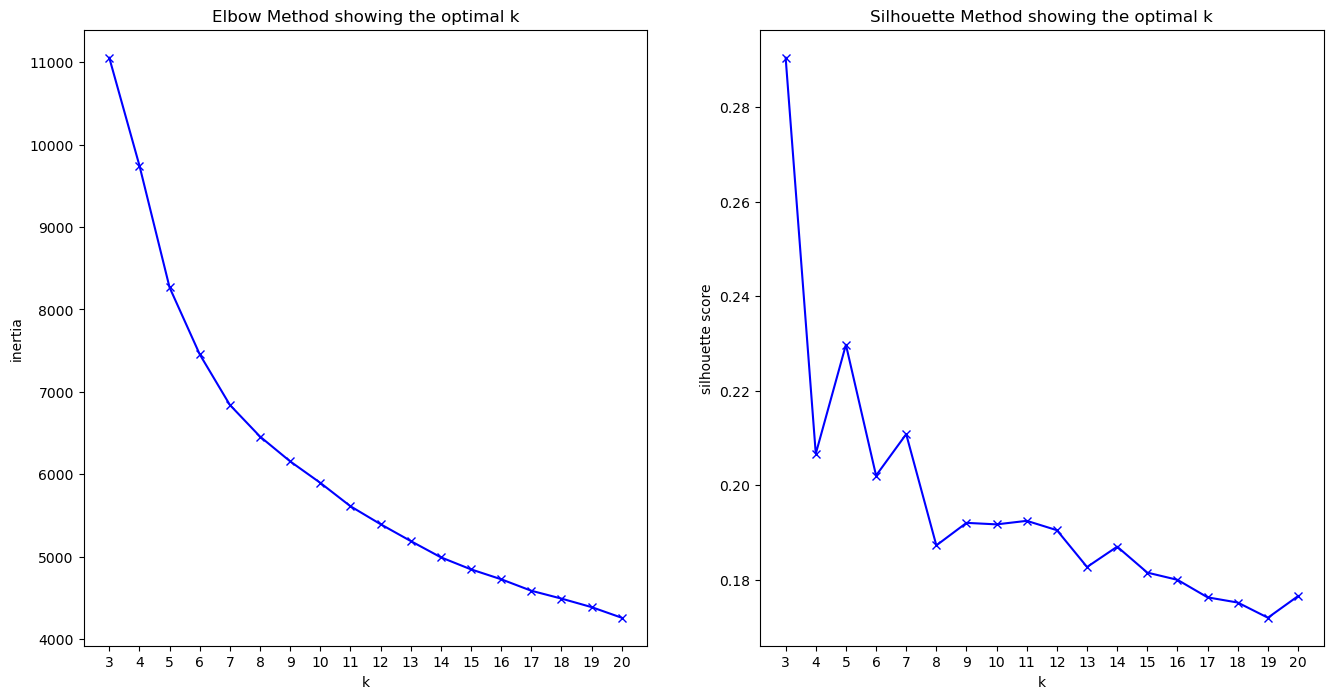

In [138]:
K = range(3, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1) # verbose = 1 to see the progress
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename. # name: kmeans_n.pickle
    # save all models and then we pick the first one, we don't need to train it again,
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0)) # steps of 1.0
ax[0].set_title('Elbow Method showing the optimal k')

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

k = 13

### Loading scaler for best model

In [139]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: # specific python error message
        print("File not found!") # it will print this error ONLY for the error specify.

In [140]:
# load scaler
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [141]:
# load best model
best_model = load("kmeans_13.pickle")

In [142]:
X

,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.05210,0.144000,0.418,88.980,4
1,0.517,0.675,0.45900,0.000000,0.518,203.853,4
2,0.707,0.681,0.06320,0.000005,0.646,117.999,4
3,0.898,0.676,0.14000,0.000000,0.742,147.991,4
4,0.668,0.758,0.48300,0.000019,0.834,147.989,3
...,...,...,...,...,...,...,...
2335,0.620,0.869,0.61500,0.000000,0.597,126.019,4
2336,0.572,0.949,0.00165,0.000195,0.530,118.974,4
2337,0.929,0.667,0.01850,0.000000,0.274,126.998,4
2338,0.816,0.513,0.01450,0.000102,0.170,96.981,4


In [143]:
# for the user
user_features_scaled = scaler2.transform(X)
user_features_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
clusters = best_model.predict(user_features_scaled_df)

In [144]:
clusters

array([ 1,  9, 11, ..., 11,  7, 11])

In [145]:
silhouette_score(user_features_scaled_df, best_model.predict(user_features_scaled_df))

0.18267911452423888

In [146]:
# we don't have control on the cluster labels
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

0     152
1     289
2      66
3      63
4     238
5     280
6      70
7     247
8     146
9     150
10      6
11    315
12    318
dtype: int64

Clusters to big df or to numerical

In [147]:
# clusters added to dataframe with only audio features
X["KMeans"] = clusters # add a column in the original dataframe with the cluster labels
X.head(10) # might be better to attach it to big df

C:\Users\Playtime\AppData\Local\Temp\ipykernel_17364\1160007169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["KMeans"] = clusters # add a column in the original dataframe with the cluster labels


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature,KMeans
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4,1
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4,9
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4,11
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4,11
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3,3
5,0.715,0.620,0.4170,0.000000,0.172,97.950,4,7
6,0.799,0.802,0.4290,0.001280,0.811,107.008,4,12
7,0.531,0.525,0.2320,0.000000,0.502,66.900,4,7
8,0.817,0.440,0.0603,0.000001,0.544,142.024,4,11
9,0.696,0.809,0.2520,0.000128,0.857,132.962,4,12


In [148]:
# clusters to all_songs_clean df
all_songs_clean['KMeans'] = clusters

In [149]:
all_songs_clean.head()

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset,KMeans
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot,1
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot,9
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot,11
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot,11
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot,3


### DBSCAN

In [150]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [151]:
# simple 
#model = DBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#yhat = model.fit_predict(X_scaled_df)
#print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),3))

In [152]:
#X['DBSCAN'] = yhat
#X.head()
#clusters = np.unique(yhat)

#### Fine tuning

In order to find out the best value for **$\epsilon$**, we follow these steps:

1. Compute the distance matrix between the all the observations
2. We fix the number of nearest neighbours **k** to MinPoints= 2*number_of_features
3. We get all the distances from each point to it's k-nearest-neighbourgh.
4. We sort all those distances in descending order.
5. We plot those distances.

Step 1

In [153]:
d = distance_matrix(X_scaled_df,X_scaled_df) # compute the distances
print(d)

[[0.         4.63258489 1.86460341 ... 2.64408126 2.20945367 2.19406694]
 [4.63258489 0.         3.65535882 ... 4.26883371 4.88400734 4.96926913]
 [1.86460341 3.65535882 0.         ... 2.14044498 2.39580621 1.78805302]
 ...
 [2.64408126 4.26883371 2.14044498 ... 0.         1.57978605 2.425639  ]
 [2.20945367 4.88400734 2.39580621 ... 1.57978605 0.         2.52812653]
 [2.19406694 4.96926913 1.78805302 ... 2.425639   2.52812653 0.        ]]


Step 2

We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [154]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.98237488  1.09214657  1.15539086 ... 11.34689909 11.59203312
  12.18186953]
 [ 1.02755153  1.06175201  1.1966922  ... 11.6553795  11.71256439
  11.89990941]
 [ 0.33486616  0.35686435  0.35773727 ... 11.49199893 11.75828707
  12.0850904 ]
 ...
 [ 0.41979094  0.46655193  0.59822266 ... 11.86261743 12.04274958
  12.34443933]
 [ 0.33819169  0.39413227  0.56177601 ... 11.40742288 11.55392414
  12.11235367]
 [ 0.54557256  0.70741831  0.73538629 ... 11.63119815 11.87678929
  12.57375125]]


Step 3


In this dataset we have two features. Therefore, we will set the MinPoints=2*2=4.

Then, the number of neighours in the neighbourhood will be set to four. How we can know a temptative value for the Epsilon? One way is to look at the biggest distance between each point and the MinPoints in the neighbourhood of the point. This will give us an idea how big are the distances in the dataset. Of course, the biggest distance in the neighbourhood of each point will be different for each point but will give us a rough idea of how to set the value for Epsilon.

We have computed the distance matrix. Let's get the fourht highest distance of each point (we have set the number of points in the neighbourhood to four). We select the 4-th column, (ie. the distance from each point to it's 4-th nearest neighbourgh (Remember that in Python the indexes starts at 0, therefore the 4th neighbourh corresponds to the 3rd index)

In [155]:
f = d2[:,13]
print(f) # The distances between every point and it's 4th nearest neighbour.

[1.26336127 1.49773511 0.56635098 ... 1.06648178 1.09417374 0.96737193]


Step 4

We sort the 4-th distances in descending order.

In [156]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[7.45624338 7.12030289 7.01411698 ... 0.47835943 0.47738652 0.44961948]


Step 5

We plot those distances and let's cross our fingers in search for a clear elbow.

C:\Users\Playtime\AppData\Local\Temp\ipykernel_17364\270027386.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


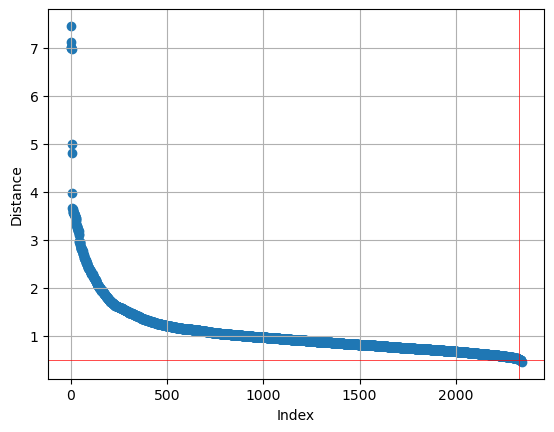

In [157]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

Values are between 1.3 and 3. Explore epsilon values:

#### Explore epsilon values

In [158]:
models = {}

for value in np.arange(1.3, 3.5, 0.1):
    model = DBSCAN(eps=value, min_samples=14) # min_samples = 2 * #features (7 features)
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df) # clusters: to which prediction will belong every cluster
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

In [159]:
pd.DataFrame(models)

,model_1.3,model_1.4,model_1.5,model_1.6,model_1.7,model_1.8,model_1.9,model_2.0,model_2.1,model_2.2,...,model_2.5,model_2.6,model_2.7,model_2.8,model_2.9,model_3.0,model_3.1,model_3.2,model_3.3,model_3.4
model,"DBSCAN(eps=1.3, min_samples=14)","DBSCAN(eps=1.4000000000000001, min_samples=14)","DBSCAN(eps=1.5000000000000002, min_samples=14)","DBSCAN(eps=1.6000000000000003, min_samples=14)","DBSCAN(eps=1.7000000000000004, min_samples=14)","DBSCAN(eps=1.8000000000000005, min_samples=14)","DBSCAN(eps=1.9000000000000006, min_samples=14)","DBSCAN(eps=2.000000000000001, min_samples=14)","DBSCAN(eps=2.1000000000000005, min_samples=14)","DBSCAN(eps=2.200000000000001, min_samples=14)",...,"DBSCAN(eps=2.500000000000001, min_samples=14)","DBSCAN(eps=2.6000000000000014, min_samples=14)","DBSCAN(eps=2.700000000000001, min_samples=14)","DBSCAN(eps=2.8000000000000016, min_samples=14)","DBSCAN(eps=2.9000000000000012, min_samples=14)","DBSCAN(eps=3.0000000000000018, min_samples=14)","DBSCAN(eps=3.1000000000000014, min_samples=14)","DBSCAN(eps=3.200000000000002, min_samples=14)","DBSCAN(eps=3.3000000000000016, min_samples=14)","DBSCAN(eps=3.400000000000002, min_samples=14)"
yhat,"[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
score,0.37,0.38,0.38,0.39,0.39,0.39,0.39,0.39,0.39,0.38,...,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38


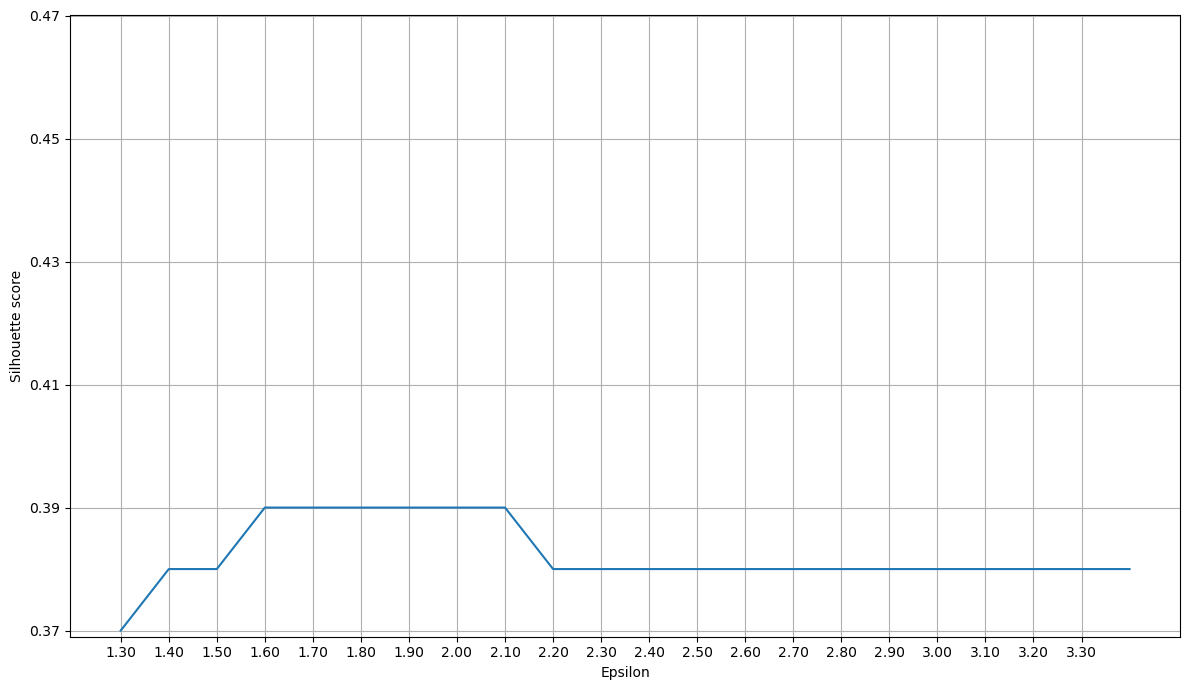

In [160]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(1.3, 3.5, 0.1)]
scores = [item[1]["score"] for item in list(models.items())]
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

We are looking for the epsilon value which give us the models with the highest Silhouette score. 

In [161]:
# check clusters of "best models" according to graph
clusters_dbscan = np.unique(models["model_2.1"]["yhat"])
clusters_dbscan

array([-1,  0,  1,  2], dtype=int64)

In [162]:
# retrieve unique clusters of one of the models
#clusters2 = np.unique(models["model_1.6"]["yhat"]) # 
#clusters2

Add clusters to big dataframe

In [163]:
all_songs_clean['DBSCAN'] = models['model_2.1']['yhat']
all_songs_clean.head()

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset,KMeans,DBSCAN
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot,1,0
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot,9,0
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot,11,0
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot,11,0
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot,3,1


In [164]:
## Save dataframe with clusters
all_songs_clean.to_csv('all_songs_clusters.csv', index=False)

## Conclusions
- KMeans: based on the elbow method and the Silhouette score we decided to go for K=13
- DBSCAN: It doesn't seem to be the best method -> the best performing one: noise and too few clusters.